In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.svm import SVC  
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, matthews_corrcoef, precision_score, recall_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, matthews_corrcoef, precision_score, recall_score

#### 改字体

In [2]:
from matplotlib import font_manager, pyplot as plt

# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称，并确保字体能支持加粗
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f and 'Bold' in f]

if t_nr_path:
    # 如果找到了Times New Roman Bold字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
    plt.rcParams['font.weight'] = 'bold'  # 设置字体为加粗
else:
    # 如果没有找到加粗的Times New Roman，尝试设置为普通的Times New Roman并加粗
    t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]
    if t_nr_path:
        prop = font_manager.FontProperties(fname=t_nr_path[0])
        plt.rcParams['font.family'] = prop.get_name()
        plt.rcParams['font.weight'] = 'bold'
    else:
        # 如果没有找到Times New Roman，使用默认的衬线字体并设置为加粗
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.weight'] = 'bold'

#### 加载数据

In [8]:
data = pd.read_csv('train-dataset-ECFPs.csv')
data2 = pd.read_csv('test-dataset-ECFPs.csv')

x_mor_train = data.iloc[:,2:]   #第三列以后的数据，Python中索引是从0开始的，读取描述符
y_mor_train = data.iloc[:,1:2]  #左开右闭，读取第二列的数据 ，读取标签
x_mor_test = data2.iloc[:,2:]
y_mor_test = data2.iloc[:,1:2]

In [9]:
X = x_mor_train    #x_mor_train 是输入特征，
Y = y_mor_train    #y_mor_train 是对应的目标变量（即标签）。
#cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)    
#K折交叉验证（Stratified K-Fold Cross Validation）
#shuffle=True 表示在每次分割前都会对数据进行随机洗牌
#random_state=0 是设置随机种子，确保结果的可重复性。

## Voting

In [41]:
# AdaBoost = AdaBoostClassifier(
#     random_state = 0,
#     algorithm = 'SAMME',
#     learning_rate = 0.5,
#     n_estimators = 383
# )

# XGBoost = XGBClassifier(
#     random_state=0, objective='binary:logistic',
#     colsample_bytree = 0.9, gamma = 0.0,
#     max_depth = 3, min_child_weight = 1,
#     n_estimators = 10, reg_alpha = 0.1,
#     reg_lambda = 0.1, subsample = 0.9
# )

GBT = GradientBoostingClassifier(random_state = 0,
                            criterion = 'friedman_mse',
                            max_depth = 12,
                            max_features = 'sqrt',
                            min_samples_leaf = 3,
                            min_samples_split = 5,
                            n_estimators = 76)

RF = RandomForestClassifier(random_state = 0,
                            class_weight = 'balanced_subsample',
                            criterion = 'entropy',
                            max_features = 'log2',
                            bootstrap = True,
                            max_depth = 20,
                            min_samples_leaf = 3,
                            min_samples_split = 5,
                            n_estimators = 76,
                            oob_score = True)

# DNN = MLPClassifier(
#     random_state=0,
#     activation='tanh',
#     hidden_layer_sizes = (110,200,110),
#     learning_rate = 'constant',
#     solver = 'sgd'
# )

# 创建投票分类器
voting_clf = VotingClassifier(
    # estimators=[('GBT', GBT), ('RF', RF), ('DNN', DNN)],
    #estimators=[('RF', RF), ('DNN', DNN)],
    estimators=[('GBT', GBT), ('RF', RF)],
    #estimators=[('GBT', GBT), ('DNN', DNN)],
    voting='soft' , # 使用概率加权投票
    n_jobs=-1
)
# 训练投票分类器
voting_clf.fit(X, Y)

# 在测试集上进行预测
predictions = voting_clf.predict(x_mor_test)
predicted_probs = voting_clf.predict_proba(x_mor_test)[:, 1]

# 计算评估指标
accuracy = accuracy_score(y_mor_test, predictions)
auc = roc_auc_score(y_mor_test, predicted_probs)
f1 = f1_score(y_mor_test, predictions)
mcc = matthews_corrcoef(y_mor_test, predictions)
precision = precision_score(y_mor_test, predictions)
recall = recall_score(y_mor_test, predictions)

# 计算特异性
cm = confusion_matrix(y_mor_test, predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# 打印结果
print(f"Voting Classifier Accuracy: {accuracy:.3f}")
print(f"Voting Classifier AUC: {auc:.3f}")
print(f"Voting Classifier F1 Score: {f1:.3f}")
print(f"Voting Classifier MCC: {mcc:.3f}")
print(f"Voting Classifier Precision: {precision:.3f}")
print(f"Voting Classifier Recall: {recall:.3f}")
print(f"Voting Classifier Specificity: {specificity:.3f}")

# 保存结果到CSV文件
results = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC', 'F1 Score', 'MCC', 'Precision', 'Recall', 'Specificity'],
    'Value': [accuracy, auc, f1, mcc, precision, recall, specificity]
})

#results.to_csv('voting_GBT-DNN.csv', index=False)

/home/md06/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/md06/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Voting Classifier Accuracy: 0.868
Voting Classifier AUC: 0.940
Voting Classifier F1 Score: 0.845
Voting Classifier MCC: 0.738
Voting Classifier Precision: 0.911
Voting Classifier Recall: 0.788
Voting Classifier Specificity: 0.935


In [42]:
# 保存模型到 pkl文件
import joblib
import pickle
with open('voting_DNN-RF-GBDT.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

/home/md06/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/md06/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 绘制直方图

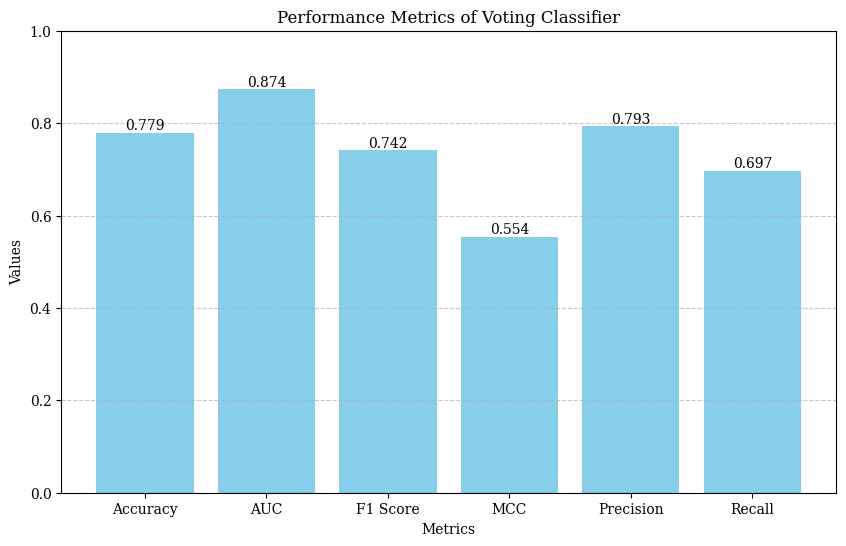

In [46]:
import matplotlib.pyplot as plt

# 性能指标
metrics = ['Accuracy', 'AUC', 'F1 Score', 'MCC', 'Precision', 'Recall']
values = [accuracy, auc, f1, mcc, precision, recall]

# 创建直方图
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue', 'skyblue'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics of Voting Classifier')
plt.ylim(0, 1)  # 限制 y 轴范围在 0 到 1 之间
plt.grid(axis='y', linestyle='--', alpha=0.7)
# 在柱形图上方显示数值
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.3f}', ha='center', va='bottom')
plt.show()

## Blending

In [37]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, matthews_corrcoef, precision_score, recall_score

# 创建基础模型
ada_boost = AdaBoostClassifier(random_state=0, algorithm='SAMME', learning_rate=0.5, n_estimators=383)
gbt = GradientBoostingClassifier(random_state=0, criterion='friedman_mse', max_depth=5, max_features='log2',
                                 min_samples_leaf=4, min_samples_split=16, n_estimators=32)
rf = RandomForestClassifier(random_state=0, class_weight='balanced', criterion='gini', max_features='sqrt',
                            bootstrap=True, max_depth=11, min_samples_leaf=5, min_samples_split=25,
                            n_estimators=76, oob_score=True)

# 划分训练集和验证集（用作元模型的训练集）
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# 基模型的训练和预测：首先，在主训练集的子集上训练每个基模型。
# 然后，这些模型在另一部分（验证集）上做预测，这些预测将被用作元模型的特征。
# 元模型：这里使用了逻辑回归作为元模型，它将使用基模型的预测结果作为输入特征来进行训练。

# 训练基模型
ada_boost.fit(X_train, Y_train)
gbt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

# 在验证集上预测
ada_val_pred = ada_boost.predict_proba(X_val)[:, 1]
gbt_val_pred = gbt.predict_proba(X_val)[:, 1]
rf_val_pred = rf.predict_proba(X_val)[:, 1]

# 将基模型的预测作为新特征
X_blend = np.vstack([ada_val_pred, gbt_val_pred, rf_val_pred]).T

# 元模型使用逻辑回归
meta_model = LogisticRegression()
meta_model.fit(X_blend, Y_val)

# 在测试集上使用基模型进行预测
ada_test_pred = ada_boost.predict_proba(x_mor_test)[:, 1]
gbt_test_pred = gbt.predict_proba(x_mor_test)[:, 1]
rf_test_pred = rf.predict_proba(x_mor_test)[:, 1]

# 创建测试集的新特征
X_test_blend = np.vstack([ada_test_pred, gbt_test_pred, rf_test_pred]).T

# 使用元模型进行最终预测
final_predictions = meta_model.predict(X_test_blend)
final_predicted_probs = meta_model.predict_proba(X_test_blend)[:, 1]

# 计算并输出多个性能指标
accuracy = accuracy_score(y_mor_test, final_predictions)
auc = roc_auc_score(y_mor_test, final_predicted_probs)
f1 = f1_score(y_mor_test, final_predictions)
mcc = matthews_corrcoef(y_mor_test, final_predictions)
precision = precision_score(y_mor_test, final_predictions)
recall = recall_score(y_mor_test, final_predictions)

# 打印结果，保留三位小数
print(f"Blended Classifier Accuracy: {accuracy:.3f}")
print(f"Blended Classifier AUC: {auc:.3f}")
print(f"Blended Classifier F1 Score: {f1:.3f}")
print(f"Blended Classifier MCC: {mcc:.3f}")
print(f"Blended Classifier Precision: {precision:.3f}")
print(f"Blended Classifier Recall: {recall:.3f}")

/home/md06/miniconda3/envs/fbw/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/md06/miniconda3/envs/fbw/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/md06/miniconda3/envs/fbw/lib/python3.8/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/md06/miniconda3/envs/fbw/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d ar

Blended Classifier Accuracy: 0.828
Blended Classifier AUC: 0.901
Blended Classifier F1 Score: 0.806
Blended Classifier MCC: 0.652
Blended Classifier Precision: 0.825
Blended Classifier Recall: 0.788


## Stacking

In [32]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, matthews_corrcoef, precision_score, recall_score

GBT = GradientBoostingClassifier(random_state = 0,
                            criterion = 'friedman_mse',
                            max_depth = 12,
                            max_features = 'sqrt',
                            min_samples_leaf = 3,
                            min_samples_split = 5,
                            n_estimators = 76)

RF = RandomForestClassifier(random_state = 0,
                            class_weight = 'balanced_subsample',
                            criterion = 'entropy',
                            max_features = 'log2',
                            bootstrap = True,
                            max_depth = 20,
                            min_samples_leaf = 3,
                            min_samples_split = 5,
                            n_estimators = 76,
                            oob_score = True)

DNN = MLPClassifier(
    random_state=0,
    activation='tanh',
    hidden_layer_sizes = (110,200,110),
    learning_rate = 'constant',
    solver = 'sgd'
)

# 创建元分类器
logreg = LogisticRegression()

# 使用Stacking方法融合模型
stacking_clf = StackingClassifier(
    estimators=[('GBT', GBT), ('RF', RF), ('DNN', DNN)],
    #estimators=[('RF', RF), ('DNN', DNN)],
    #estimators=[('GBT', GBT), ('DNN', DNN)],
    #estimators=[('GBT', GBT), ('RF', RF)],
    final_estimator=logreg,
    cv=5,
    stack_method='auto',
    n_jobs=-1
)

# 训练投票分类器
stacking_clf.fit(X, Y)

# 在测试集上进行预测
predictions = stacking_clf.predict(x_mor_test)
predicted_probs = stacking_clf.predict_proba(x_mor_test)[:, 1]

# 计算评估指标
accuracy = accuracy_score(y_mor_test, predictions)
auc = roc_auc_score(y_mor_test, predicted_probs)
f1 = f1_score(y_mor_test, predictions)
mcc = matthews_corrcoef(y_mor_test, predictions)
precision = precision_score(y_mor_test, predictions)
recall = recall_score(y_mor_test, predictions)

# 计算特异性
cm = confusion_matrix(y_mor_test, predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# 打印结果
print(f"stacking Classifier Accuracy: {accuracy:.3f}")
print(f"stacking Classifier AUC: {auc:.3f}")
print(f"stacking Classifier F1 Score: {f1:.3f}")
print(f"stacking Classifier MCC: {mcc:.3f}")
print(f"stacking Classifier Precision: {precision:.3f}")
print(f"stacking Classifier Recall: {recall:.3f}")
print(f"stacking Classifier Specificity: {specificity:.3f}")

# 保存结果到CSV文件
results = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC', 'F1 Score', 'MCC', 'Precision', 'Recall', 'Specificity'],
    'Value': [accuracy, auc, f1, mcc, precision, recall, specificity]
})

results.to_csv('stacking_GBT-RF-DNN.csv', index=False)

/home/md06/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/md06/.local/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


stacking Classifier Accuracy: 0.868
stacking Classifier AUC: 0.940
stacking Classifier F1 Score: 0.845
stacking Classifier MCC: 0.738
stacking Classifier Precision: 0.911
stacking Classifier Recall: 0.788
stacking Classifier Specificity: 0.935


/home/md06/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/md06/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/md06/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/md06/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/md06/.local/lib/python3.8/site-packages/sklearn/neural

## Boosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, matthews_corrcoef, precision_score, recall_score

AdaBoost = AdaBoostClassifier(
    random_state=0,
    algorithm='SAMME',
    learning_rate=0.5,
    n_estimators=383
)

GBT = GradientBoostingClassifier(
    random_state=0, criterion='friedman_mse',
    max_depth=5, max_features='log2',
    min_samples_leaf=4, min_samples_split=16,
    n_estimators=32
)

XGBoost = XGBClassifier(
    random_state=0, objective='binary:logistic',
    colsample_bytree=0.9, gamma=0.0,
    max_depth=3, min_child_weight=1,
    n_estimators=10, reg_alpha=0.1,
    reg_lambda=0.1, subsample=0.9
)

# 创建AdaBoost分类器
boosting_clf = AdaBoostClassifier(
    base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=0
)

# 将基础分类器放入boosting分类器中
boosting_clf.estimators_ = [AdaBoost, GBT, XGBoost]

# 训练boosting分类器
boosting_clf.fit(X, Y)

# 在测试集上进行预测
predictions = boosting_clf.predict(x_mor_test)
predicted_probs = boosting_clf.predict_proba(x_mor_test)[:, 1]

# 计算并输出多个性能指标
accuracy = accuracy_score(y_mor_test, predictions)
auc = roc_auc_score(y_mor_test, predicted_probs)
f1 = f1_score(y_mor_test, predictions)
mcc = matthews_corrcoef(y_mor_test, predictions)
precision = precision_score(y_mor_test, predictions)
recall = recall_score(y_mor_test, predictions)

# 打印结果，保留三位小数
print(f"Boosting Classifier Accuracy: {accuracy:.3f}")
print(f"Boosting Classifier AUC: {auc:.3f}")
print(f"Boosting Classifier F1 Score: {f1:.3f}")
print(f"Boosting Classifier MCC: {mcc:.3f}")
print(f"Boosting Classifier Precision: {precision:.3f}")
print(f"Boosting Classifier Recall: {recall:.3f}")

/home/md06/miniconda3/envs/fbw/lib/python3.8/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/md06/miniconda3/envs/fbw/lib/python3.8/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Boosting Classifier Accuracy: 0.779
Boosting Classifier AUC: 0.874
Boosting Classifier F1 Score: 0.742
Boosting Classifier MCC: 0.554
Boosting Classifier Precision: 0.793
Boosting Classifier Recall: 0.697


## Bagging
##### Bagging 通常是在同一种类型的模型上进行的，而不是不同类型的模型，
##### 如果要混合不同类型的模型，应考虑使用 VotingClassifier 或 StackingClassifier。

In [ ]:
GBT = GradientBoostingClassifier(random_state = 0,
                            criterion = 'friedman_mse',
                            max_depth = 12,
                            max_features = 'sqrt',
                            min_samples_leaf = 3,
                            min_samples_split = 5,
                            n_estimators = 76)

# 使用Bagging方法融合模型
bagging_clf = BaggingClassifier(
    base_estimator=None,  # 不指定基估计器，使用默认的决策树
    n_estimators=10,      # 使用10个基估计器
    max_samples=0.8,      # 每个基估计器使用80%的随机样本
    max_features=0.8,     # 每个基估计器使用80%的随机特征
    random_state=0,
    n_jobs=-1             # 使用所有可用的CPU核心
)

# 训练Bagging分类器
bagging_clf.fit(X, Y)

# 在测试集上进行预测
predictions = bagging_clf.predict(x_mor_test)
predicted_probs = bagging_clf.predict_proba(x_mor_test)[:, 1]

# 计算评估指标
accuracy = accuracy_score(y_mor_test, predictions)
auc = roc_auc_score(y_mor_test, predicted_probs)
f1 = f1_score(y_mor_test, predictions)
mcc = matthews_corrcoef(y_mor_test, predictions)
precision = precision_score(y_mor_test, predictions)
recall = recall_score(y_mor_test, predictions)

# 计算特异性
cm = confusion_matrix(y_mor_test, predictions)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# 打印结果，保留三位小数
print(f"Bagging Classifier Accuracy: {accuracy:.3f}")
print(f"Bagging Classifier AUC: {auc:.3f}")
print(f"Bagging Classifier F1 Score: {f1:.3f}")
print(f"Bagging Classifier MCC: {mcc:.3f}")
print(f"Bagging Classifier Precision: {precision:.3f}")
print(f"Bagging Classifier Recall: {recall:.3f}")

# 保存结果到CSV文件
results = pd.DataFrame({
    'Metric': ['Accuracy', 'AUC', 'F1 Score', 'MCC', 'Precision', 'Recall', 'Specificity'],
    'Value': [accuracy, auc, f1, mcc, precision, recall, specificity]
})

results.to_csv('Bagging_GBT-RF-DNN.csv', index=False)

## 例子

In [6]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# 定义基模型
base_learners = [
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# 定义元模型
meta_learner = LogisticRegression()

# 创建堆叠分类器
stack_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)
stack_clf

StackingClassifier(estimators=[('svc', SVC(probability=True)),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())